# Introduction COVID19
## COVID-19 Pandemic Visualizations and ML modelling With sklearn / scikit-learn

### ML models: KNN, Linear Regression, Logistic Regression and RandomForestRegressor 

The first case may be traced back to 17 November 2019.[12] As of 6 June 2020, more than 6.8 million cases have been reported across 188 countries and territories, resulting in more than 362,000 deaths.

<font color = 'blue'>
Contents:
1. [Importing data and libraries](#1)
1. [Load and Check Data](#2)
    * [Combining Data](#3)
1. [Visualizations](#4)
1. [Modelling](#5)
    * [KNN](#6)
    * [Linear regression](#7)
    * [LogisticRegression](#8) 
    * [RandomForestRegressor](#9)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-global-forecasting-week-4/train.csv
/kaggle/input/covid19-global-forecasting-week-4/submission.csv
/kaggle/input/covid19-global-forecasting-week-4/test.csv


<a id = '1'> </a> </br>
# Importing data and libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

<a id = '2'> </a> </br>
# Load and Check Data

In [3]:
train = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/train.csv") 
test = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-4/test.csv") 
sub=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/submission.csv')

In [4]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [5]:
data = train.drop(labels=['Id','Province_State','Country_Region','Date'], axis=1)

In [6]:
print(data.head(2))
print(test.head(2))

   ConfirmedCases  Fatalities
0             0.0         0.0
1             0.0         0.0
   ForecastId Province_State Country_Region        Date
0           1            NaN    Afghanistan  2020-04-02
1           2            NaN    Afghanistan  2020-04-03


In [7]:
data2 = train.drop(labels=['Province_State','Country_Region','Date'], axis=1)

In [8]:
print(data2.head(2))

   Id  ConfirmedCases  Fatalities
0   1             0.0         0.0
1   2             0.0         0.0


<a id = '3'> </a> </br>
# Combining Data
* recheck data

In [9]:
pd.merge(data2,data)

,Id,ConfirmedCases,Fatalities
0,1,0.0,0.0
1,1,0.0,0.0
2,1,0.0,0.0
3,1,0.0,0.0
4,1,0.0,0.0
...,...,...,...
157889486,35993,37.0,4.0
157889487,35993,37.0,4.0
157889488,35994,37.0,4.0
157889489,35994,37.0,4.0


In [10]:
print(data.shape)
print(data2.shape)
print(data2.head(2))


(35995, 2)
(35995, 3)
   Id  ConfirmedCases  Fatalities
0   1             0.0         0.0
1   2             0.0         0.0


In [11]:
df_new = data2.rename(columns={'Id': 'ForecastId'})

In [12]:
print(df_new.head())
print(df_new.info())

   ForecastId  ConfirmedCases  Fatalities
0           1             0.0         0.0
1           2             0.0         0.0
2           3             0.0         0.0
3           4             0.0         0.0
4           5             0.0         0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35995 entries, 0 to 35994
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ForecastId      35995 non-null  int64  
 1   ConfirmedCases  35995 non-null  float64
 2   Fatalities      35995 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 843.8 KB
None


In [13]:
df_new.isna()

,ForecastId,ConfirmedCases,Fatalities
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
35990,False,False,False
35991,False,False,False
35992,False,False,False
35993,False,False,False


In [14]:
df_new.shape

(35995, 3)

<a id = '4'> </a> </br>
# Visualizations

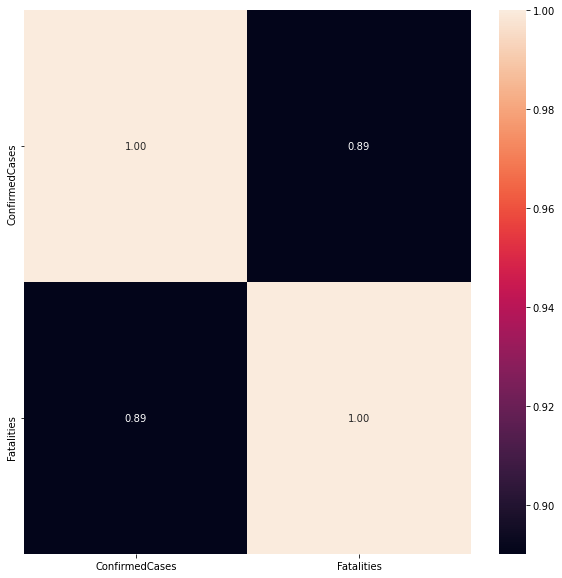

In [15]:
Group_features = ['ConfirmedCases','Fatalities']
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_new[Group_features].corr(), annot = True, fmt = '.2f')
plt.show()

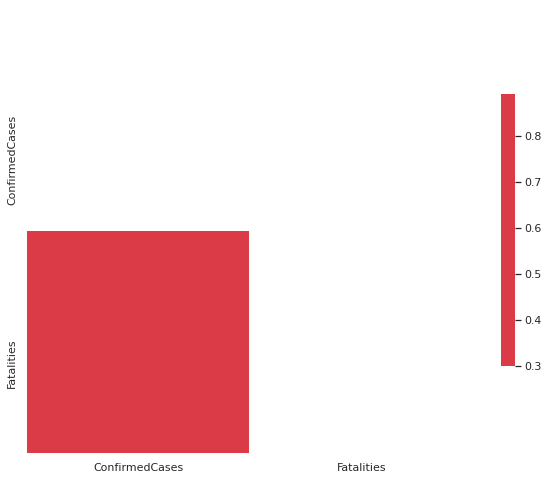

In [16]:
corr = df_new[Group_features].corr()
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

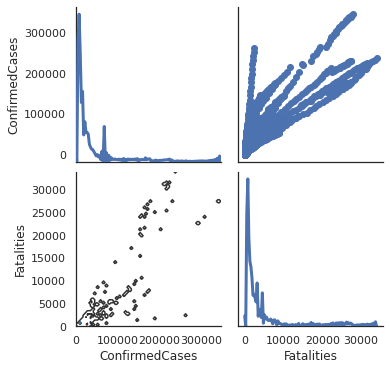

In [17]:
sns.set(style="white")
df = df_new.loc[:,['ConfirmedCases','Fatalities']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

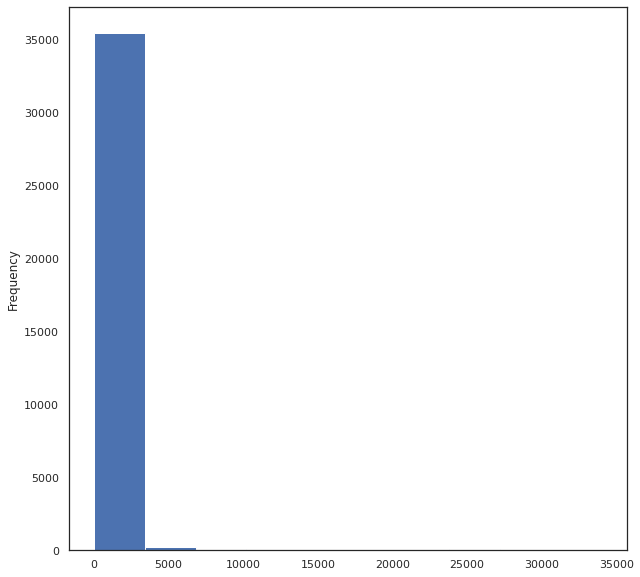

In [18]:
# histogram
# values of Fatalities 
df_new.Fatalities.plot(kind = 'hist',bins = 10,figsize = (10,10))
plt.show()

(0.0, 100.0)

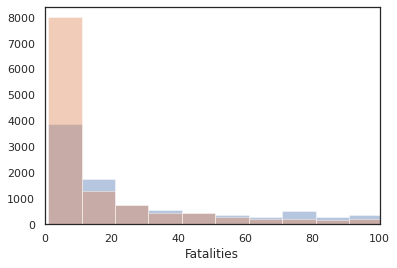

In [19]:
fig, ax = plt.subplots()
for a in [df_new.ConfirmedCases, df_new.Fatalities]:
    sns.distplot(a, bins=range(1, 110, 10), ax=ax, kde=False)
ax.set_xlim([0, 100])

(array([[3.5995e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.5136e+04, 4.1800e+02, 1.2700e+02, 8.5000e+01, 9.4000e+01,
         5.3000e+01, 5.2000e+01, 9.0000e+00, 7.0000e+00, 1.4000e+01]]),
 array([     0. ,  34581.3,  69162.6, 103743.9, 138325.2, 172906.5,
        207487.8, 242069.1, 276650.4, 311231.7, 345813. ]),
 <a list of 2 Lists of Patches objects>)

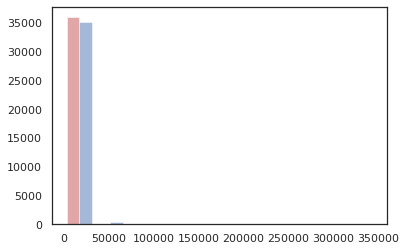

In [20]:
plt.hist([df_new.Fatalities, df_new.ConfirmedCases], color=['r','b'], alpha=0.5)

<a id = '5'> </a> </br>
# Modelling 

* KNN
* Linear regression
* LogisticRegression

In [21]:
df_new = df_new[:-22536]

In [22]:
X = df_new['ConfirmedCases'].values
y = df_new['Fatalities'].values

In [23]:
print(X.shape)
print(y.shape)

(13459,)
(13459,)


In [24]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [25]:
print(X.shape)
print(y.shape)

(13459, 1)
(13459, 1)


<a id = '6'> </a> </br>
### KNN 

In [26]:
# !!! DO NOT FORGET TO LIBRARIES
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=12)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print('Score', knn.score(X_test, y_test))


Score 0.6708766716196136


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


<a id = '7'> </a> </br>
### LinearRegression

In [27]:
# !!! DO NOT FORGET TO LIBRARIES
reg = LinearRegression()

reg.fit(X_train,y_train)
preds = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(rmse)
print('Score',reg.score(X_test,y_test))

253.0456303893933
Score 0.8217671487814568


<a id = '8'> </a> </br>
### LogisticRegression

In [28]:
# !!! DO NOT FORGET TO LIBRARIES

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict(X_test)
print("Score :",clf.score(X_test, y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score : 0.4739970282317979


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<a id = '9'> </a> </br>
### RandomForestRegressor

In [29]:
# !!! DO NOT FORGET TO LIBRARIES


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Score
print("Score :",rf.score(X_test, y_test))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error: 157.41 degrees.
Score : 0.8200890038788061
